In [52]:
import numpy as np
import MDAnalysis
from MDAnalysis.tests.datafiles import PSF, DCD

print(MDAnalysis.__version__)

1.1.1


## Universe and atoms groups

In [6]:
u = MDAnalysis.Universe(PSF, DCD)
print(u)

<Universe with 3341 atoms>


In [7]:
u.atoms

<AtomGroup with 3341 atoms>

In [8]:
list(u.atoms[:5])

[<Atom 1: N of type 56 of resname MET, resid 1 and segid 4AKE>,
 <Atom 2: HT1 of type 2 of resname MET, resid 1 and segid 4AKE>,
 <Atom 3: HT2 of type 2 of resname MET, resid 1 and segid 4AKE>,
 <Atom 4: HT3 of type 2 of resname MET, resid 1 and segid 4AKE>,
 <Atom 5: CA of type 22 of resname MET, resid 1 and segid 4AKE>]

In [10]:
print(u.atoms[100:130].residues)
list(u.atoms[100:130].residues)

<ResidueGroup [<Residue LEU, 6>, <Residue GLY, 7>, <Residue ALA, 8>]>


[<Residue LEU, 6>, <Residue GLY, 7>, <Residue ALA, 8>]

In [13]:
print(u.atoms.segments)
list(u.atoms.segments)

<SegmentGroup [<Segment 4AKE>]>


[<Segment 4AKE>]

In [14]:
# Number of residues in u 
len(u.atoms.residues)

214

In [17]:
# Residues names for atoms 1000 to 1300
resnames = u.atoms[999:1300].residues.resnames
# Resiudes ids
resids = u.atoms[999:13000].residues.resids
list(zip(resnames, resids))

[('LEU', 67),
 ('VAL', 68),
 ('LYS', 69),
 ('GLU', 70),
 ('ARG', 71),
 ('ILE', 72),
 ('ALA', 73),
 ('GLN', 74),
 ('GLU', 75),
 ('ASP', 76),
 ('CYS', 77),
 ('ARG', 78),
 ('ASN', 79),
 ('GLY', 80),
 ('PHE', 81),
 ('LEU', 82),
 ('LEU', 83),
 ('ASP', 84),
 ('GLY', 85),
 ('PHE', 86)]

In [18]:
# 100th residue
res100 = u.atoms.residues[99]
print(res100.resid, res100.resname)

100 GLY


## Selections

In [20]:
# Select al C alpha atoms from the protein
CA = u.select_atoms("protein and name CA")
CA

<AtomGroup with 214 atoms>

In [22]:
# Select all ASP or GLU residues for the C alpha atoms
acidic = CA.select_atoms("resname ASP or resname GLU")
list(acidic.residues)

[<Residue GLU, 22>,
 <Residue ASP, 33>,
 <Residue GLU, 44>,
 <Residue ASP, 51>,
 <Residue ASP, 54>,
 <Residue ASP, 61>,
 <Residue GLU, 62>,
 <Residue GLU, 70>,
 <Residue GLU, 75>,
 <Residue ASP, 76>,
 <Residue ASP, 84>,
 <Residue ASP, 94>,
 <Residue GLU, 98>,
 <Residue ASP, 104>,
 <Residue GLU, 108>,
 <Residue ASP, 110>,
 <Residue ASP, 113>,
 <Residue GLU, 114>,
 <Residue ASP, 118>,
 <Residue GLU, 143>,
 <Residue ASP, 146>,
 <Residue ASP, 147>,
 <Residue GLU, 151>,
 <Residue GLU, 152>,
 <Residue ASP, 158>,
 <Residue ASP, 159>,
 <Residue GLU, 161>,
 <Residue GLU, 162>,
 <Residue GLU, 170>,
 <Residue GLU, 185>,
 <Residue GLU, 187>,
 <Residue ASP, 197>,
 <Residue GLU, 204>,
 <Residue ASP, 208>,
 <Residue GLU, 210>]

In [23]:
u.select_atoms("resid 5-100")

<AtomGroup with 1439 atoms>

In [24]:
u.select_atoms("resname ASP GLU HS* and name CA")

<AtomGroup with 38 atoms>

In [25]:
u.select_atoms("((resname ASP or resname GLU) and not (backbone or name CB or name CG)) \
                   and around 4.0 ((resname LYS or resname ARG) \
                                 and not (backbone or name CB or name CG))").residues

<ResidueGroup with 30 residues>

#### Excercises

Select the range of resids 100 to 200 (“100-200”) with a selection. Compare the result to what you get by slicing the u.atoms.residues appropriately.

In [32]:
print(u.select_atoms("resid 100-200").residues)
print(u.atoms.residues[99:200])
list(u.select_atoms("resid 100-200").residues) == list(u.atoms.residues[99:200])

<ResidueGroup [<Residue GLY, 100>, <Residue ILE, 101>, <Residue ASN, 102>, ..., <Residue GLY, 198>, <Residue THR, 199>, <Residue LYS, 200>]>
<ResidueGroup [<Residue GLY, 100>, <Residue ILE, 101>, <Residue ASN, 102>, ..., <Residue GLY, 198>, <Residue THR, 199>, <Residue LYS, 200>]>


True

Select all residues that do not contain a Cβ (“CB”) atom. How many are there? What residue names did you find?

In [37]:
print(list(u.select_atoms("(byres name CA) and not (byres name CB)").residues)[0:10])
print("\nNumber of resiudes: {}".format(len(u.select_atoms("(byres name CA) and not (byres name CB)").residues)))

[<Residue GLY, 7>, <Residue GLY, 10>, <Residue GLY, 12>, <Residue GLY, 14>, <Residue GLY, 25>, <Residue GLY, 32>, <Residue GLY, 42>, <Residue GLY, 46>, <Residue GLY, 56>, <Residue GLY, 80>]

Number of resiudes: 20


## Atom Groups

In [40]:
CA = u.select_atoms("protein and name CA")
r = CA.positions #returns an array
r.shape

(214, 3)

AdK consists of three domains:

- CORE residues 1-29, 60-121, 160-214 (gray)
- NMP residues 30-59 (blue)
- LID residues 122-159 (yellow)

Calculate the center of mass and the center of geometry for each of the three domains.

In [46]:
domains = {
    'CORE': u.select_atoms("protein and (resid 1-29 60-121 160-214)"),
    'NMP': u.select_atoms("protein and (resid 30-59)"),
    'LID': u.select_atoms("protein and (resid 122-159)")
    
}

geometry_center = dict((name, dom.centroid()) for name,dom in domains.items())
mass_center = dict((name, dom.center_of_mass()) for name,dom in domains.items())

print('Center of geometry:\n',geometry_center)
print('\nCenter of mass:\n',mass_center)

Center of geometry:
 {'CORE': array([4.43884299, 2.0538954 , 1.63895353]), 'NMP': array([ -2.99990683, -13.62532303,  -2.93235767]), 'LID': array([-15.16075675,   2.11599549,  -4.37305075])}

Center of mass:
 {'CORE': array([4.564116  , 2.08700105, 1.54992649]), 'NMP': array([ -3.20330174, -13.60247613,  -3.06221538]), 'LID': array([-15.11337499,   2.12292226,  -4.40910485])}


What are the distances between the centers of mass?

In [47]:
from numpy.linalg import norm

print(norm(mass_center['CORE'] - mass_center['NMP']))
print(norm(mass_center['CORE'] - mass_center['LID']))
print(norm(mass_center['NMP'] - mass_center['LID']))

18.1042626243636
20.56003396017224
19.772508960939916


Write a function theta_NMP() that takes a Universe as an argument and computes θNMP

In [56]:
def theta_NMP(u):
   """Calculate the NMP-CORE angle for E. coli AdK in degrees"""
   A = u.select_atoms("resid 115-125 and (backbone or name CB)").center_of_geometry()
   B = u.select_atoms("resid 90-100 and (backbone or name CB)").center_of_geometry()
   C = u.select_atoms("resid 35-55 and (backbone or name CB)").center_of_geometry()
   BA = A - B
   BC = C - B
   theta = np.arccos(np.dot(BA, BC)/(norm(BA)*norm(BC)))
   return np.rad2deg(theta)

def theta_LID(u):
   """Calculate the LID-CORE angle for E. coli AdK in degrees"""
   A = u.select_atoms("resid 179-185 and (backbone or name CB)").center_of_geometry()
   B = u.select_atoms("resid 115-125 and (backbone or name CB)").center_of_geometry()
   C = u.select_atoms("resid 125-153 and (backbone or name CB)").center_of_geometry()
   BA = A - B
   BC = C - B
   theta = np.arccos(np.dot(BA, BC)/(norm(BA)*norm(BC)))
   return np.rad2deg(theta)

In [55]:
theta_NMP(u)

44.124820978242475

In [58]:
theta_LID(u)

107.00880885646153

## Processing atom groups

In [59]:
CORE = u.select_atoms("resid 1-29 60-121 160-214")
CORE.write("./data/Adk_core.pdb")

/Users/danielibarrola/miniconda3/envs/pharma/lib/python3.7/site-packages/MDAnalysis/coordinates/PDB.py:864: DeprecationWarning: Using the last letter of the segid for the chainID is now deprecated and will be changed in 2.0. In 2.0, the chainID attribute will be used if it exists, or a placeholder value.
  "exists, or a placeholder value.", DeprecationWarning)
/Users/danielibarrola/miniconda3/envs/pharma/lib/python3.7/site-packages/MDAnalysis/coordinates/PDB.py:1032: UserWarning: Found no information for attr: 'altLocs' Using default value of ' '
  "".format(attrname, default))
/Users/danielibarrola/miniconda3/envs/pharma/lib/python3.7/site-packages/MDAnalysis/coordinates/PDB.py:1032: UserWarning: Found no information for attr: 'icodes' Using default value of ' '
  "".format(attrname, default))
/Users/danielibarrola/miniconda3/envs/pharma/lib/python3.7/site-packages/MDAnalysis/coordinates/PDB.py:1032: UserWarning: Found no information for attr: 'occupancies' Using default value of '1.0

## Trajectory analysis

In [60]:
# Lenght of trajectory or number of frames
len(u.trajectory)

98

In [62]:
i = 0
for ts in u.trajectory:
    if i == 10:
        break
    print("Frame: {0:5d}, Time: {1:8.3f} ps".format(ts.frame, u.trajectory.time))
    print("Rgyr: {0:g} A".format(u.atoms.radius_of_gyration()))
    i += 1

Frame:     0, Time:    1.000 ps
Rgyr: 16.669 A
Frame:     1, Time:    2.000 ps
Rgyr: 16.6732 A
Frame:     2, Time:    3.000 ps
Rgyr: 16.7315 A
Frame:     3, Time:    4.000 ps
Rgyr: 16.7223 A
Frame:     4, Time:    5.000 ps
Rgyr: 16.744 A
Frame:     5, Time:    6.000 ps
Rgyr: 16.7185 A
Frame:     6, Time:    7.000 ps
Rgyr: 16.7741 A
Frame:     7, Time:    8.000 ps
Rgyr: 16.7764 A
Frame:     8, Time:    9.000 ps
Rgyr: 16.7894 A
Frame:     9, Time:   10.000 ps
Rgyr: 16.8289 A


In [63]:
Rgyr = []
protein = u.select_atoms("protein")
for ts in u.trajectory:
    Rgyr.append((u.trajectory.time, protein.radius_of_gyration()))
Rgyr = np.array(Rgyr)

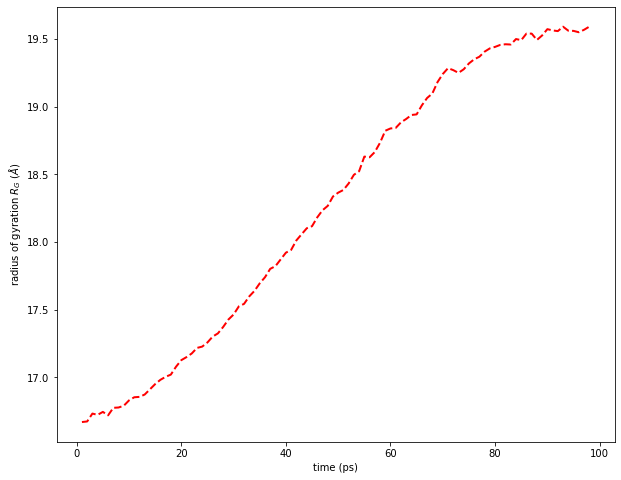

In [67]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(10,8))
ax.plot(Rgyr[:,0], Rgyr[:,1], 'r--', lw=2, label=r"$R_G$")
ax.set_xlabel("time (ps)")
ax.set_ylabel(r"radius of gyration $R_G$ ($\AA$)")
plt.show()

Calculate the time series θNMP(t) and θLID(t)

In [68]:
nmp = []
lid = []
for ts in u.trajectory:
    nmp.append((u.trajectory.time, theta_NMP(u)))
    lid.append((u.trajectory.time, theta_LID(u)))
nmp = np.array(nmp)
lid = np.array(lid)

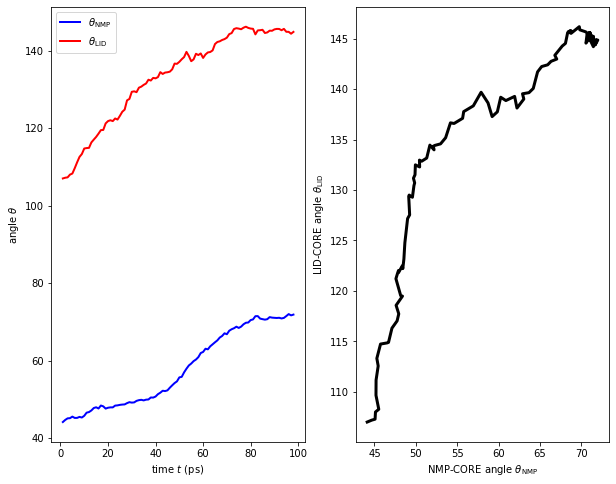

In [78]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10,8))
# Plot angles vs timestep
axes[0].plot(nmp[:,0], nmp[:,1],'b-', lw=2, label=r"$\theta_{\mathrm{NMP}}$")
axes[0].plot(lid[:,0], lid[:,1], 'r-', lw=2, label=r"$\theta_{\mathrm{LID}}$")
axes[0].set_xlabel(r"time $t$ (ps)")
axes[0].set_ylabel(r"angle $\theta$")
axes[0].legend()
# Plot NMP angle vs LID angle
axes[1].plot(nmp[:,1], lid[:,1],'k-', lw=3)
axes[1].set_xlabel(r"NMP-CORE angle $\theta_{\mathrm{NMP}}$")
axes[1].set_ylabel(r"LID-CORE angle $\theta_{\mathrm{LID}}$")

plt.show()